<a href="https://colab.research.google.com/github/daianjibetu/TMDS_Signal_Simulator/blob/main/TMDS_Signal_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2進数に変換

In [1]:
def IntToBits(indata):
    outdata = []
    
    for element in indata:
        str_array = list(format(element, '08b'))
        outdata.append([int(s) for s in str_array])
    
    return outdata

ビット順序反転

In [2]:
def BitsReverse(indata):
    outdata = []

    for elements in indata:
        outdata.append(list(reversed(elements)))

    return outdata

XNORプロセス

In [3]:
def XNOR(indata, isEncode):
    outdata = []

    outdata.append(indata[0])
    for i in range(1,8):
        if isEncode:
            if (outdata[i - 1] == indata[i]):
                outdata.append(1)
            else:
                outdata.append(0)
        else:
            if (indata[i - 1] == indata[i]):
                outdata.append(1)
            else:
                outdata.append(0)
    
    if isEncode:
        outdata.append(0)

    return outdata

XORプロセス

In [4]:
def XOR(indata, isEncode):
    outdata = []

    outdata.append(indata[0])
    for i in range(1,8):
        if isEncode:
            if (outdata[i - 1] == indata[i]):
                outdata.append(0)
            else:
                outdata.append(1)
        else:
            if (indata[i - 1] == indata[i]):
                outdata.append(0)
            else:
                outdata.append(1)
    
    if isEncode:
        outdata.append(1)

    return outdata

Transition Minimized（遷移時間最短）

In [5]:
def TransitionMinimized(indata):
    outdata = []

    for elements in indata:
        ones = sum(elements)
        if (ones > 4 or (ones == 4 and elements[0] == 0)):
            outdata.append(XNOR(elements, True))
        else:
            outdata.append(XOR(elements, True))
    
    return outdata

ビット反転

In [6]:
def inv(bit):
    if(bit == 0):   
        return 1
    else:
        return 0

Throughプロセス

In [7]:
def Through(indata, isEncode):
    outdata = []

    for i in range(8):
        outdata.append(indata[i])
    
    outdata.append(indata[8])
    
    if isEncode:
        outdata.append(0)

    return outdata

Inverseプロセス

In [8]:
def Inverse(indata, isEncode):
    outdata = []

    for i in range(8):
        outdata.append(inv(indata[i]))
    
    outdata.append(indata[8])
    
    if isEncode:
        outdata.append(1)

    return outdata

DC-Balancing（DCバランス）

In [9]:
def DCBalancing(indata):
    outdata = []

    cnt = 0

    for elements in indata:
        zeros = 0
        ones = 0
        for i in range(8):
            ones += elements[i]
        zeros = 8 - ones
        
        if (cnt == 0 or zeros == ones):
            if (elements[8] == 0):
                outdata.append(Inverse(elements, True))
                cnt += (zeros - ones)
            else:
                outdata.append(Through(elements, True))
                cnt += (ones - zeros)
        else:
            if ((cnt > 0 and ones > zeros) or (cnt < 0 and zeros > ones)):
                outdata.append(Inverse(elements, True))
                cnt += ((zeros - ones) + 2 * elements[8])
            else:
                outdata.append(Through(elements, True))
                cnt += ((ones - zeros) - 2 * inv(elements[8]))
    
    return outdata

エンコード

In [10]:
def TMDSEncode(indata):
    tmpdata = TransitionMinimized(indata)
    outdata = DCBalancing(tmpdata)

    return outdata

シリアライズ

In [11]:
def Serialize(indata):
    outdata = sum(indata, [])

    return outdata

デシリアライズ

In [12]:
def DeSerialize(indata):
    bits = 10
    outdata = [indata[i : (i + bits)] for i in range(0, len(indata), bits)]

    return outdata

デコード

In [13]:
def TMDSDecode(indata):
    tmpdata = []
    outdata = []

    for elements in indata:
        if (elements.pop() == 0):
            tmpdata.append(Through(elements, False))
        else:
            tmpdata.append(Inverse(elements, False))

    for elements in tmpdata:
        if (elements.pop() == 0):
            outdata.append(XNOR(elements, False))
        else:
            outdata.append(XOR(elements, False))
    
    return outdata

整数に変換

In [14]:
def BitsToInt(indata):
    outdata = []

    for elements in indata:
        str_array = ''.join([str(n) for n in elements])
        outdata.append(int(str_array, 2))
    
    return outdata

サンプルデータ

In [15]:
#R_data = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
#R_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#R_data = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#R_data = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
#R_data = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
#R_data = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
#R_data = [238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238, 238]
#R_data = [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
#R_data = [210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210]
#R_data = [213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213]
#R_data = [255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0, 255, 0]
#R_data = [255, 255, 0, 0, 255, 255, 0, 0, 255, 255, 0, 0, 255, 255, 0, 0, 255, 255, 0, 0, 255, 255, 0, 0]
#R_data = [255, 255, 255, 0, 0, 0, 255, 255, 255, 0, 0, 0, 255, 255, 255, 0, 0, 0, 255, 255, 255, 0, 0, 0]
R_data = [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251]
#R_data = [255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 0, 255, 255, 255, 255, 255, 255, 0]

エンコーダー部

In [16]:
array_1 = IntToBits(R_data)
#print(array_1)
array_2 = BitsReverse(array_1)
#print(array_2)
array_3 = TMDSEncode(array_2)
#print(array_3)
array_4 = Serialize(array_3)
#print(array_4)

信号出力

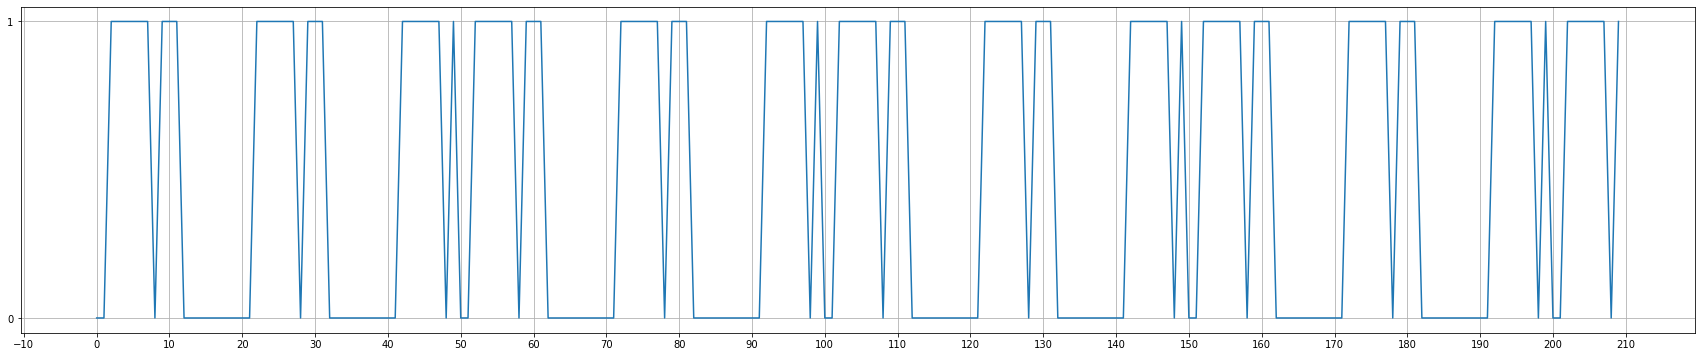

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (30, 6)) 
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.plot(array_4)
plt.grid()
plt.show()

デコーダー部

In [18]:
array_5 = DeSerialize(array_4)
#print(array_5)
array_6 = TMDSDecode(array_5)
#print(array_6)
array_7 = BitsReverse(array_6)
#print(array_7)
array_8 = BitsToInt(array_7)
print(array_8)

[251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251]
